In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Object tracking is process to locate the moving object. The object mean shifting steps are as follow:
#Taking first frame of the video
#setup initial location on window
#set up the ROI for tracking
#setup the termination criteria, either 10 iterations or move by 1 point
cap = cv2.VideoCapture('slow_traffic.mkv')

#Taking first frame of the video
ret, frame = cap.read()

#setup initial location on window
x,y,w,h = 300,200,100,50
track_window = (x,y,w,h)

#set up the ROI for tracking
roi = frame[y:y+h, x:x+w]

#now apply histogram back projection
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180],[0,180])
cv2.normalize(roi_hist,roi_hist,0, 255, cv2.NORM_MINMAX)
term_crit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)


while(True):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0], roi_hist, [0,180], 1)
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        x,y,w,h = track_window
        final_image = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,2),3)
        cv2.imshow('Frame',frame)
        cv2.imshow('Final', final_image)
        if cv2.waitKey(20) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

### Track Object using camshift

In [3]:
#Object tracking is process to locate the moving object. The object mean shifting steps are as follow:
#Taking first frame of the video
#setup initial location on window
#set up the ROI for tracking
#setup the termination criteria, either 10 iterations or move by 1 point
cap = cv2.VideoCapture('slow_traffic.mkv')

#Taking first frame of the video
ret, frame = cap.read()

#setup initial location on window
x,y,w,h = 300,200,100,50
track_window = (x,y,w,h)

#set up the ROI for tracking
roi = frame[y:y+h, x:x+w]

#now apply histogram back projection
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180],[0,180])
cv2.normalize(roi_hist,roi_hist,0, 255, cv2.NORM_MINMAX)
term_crit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)


while(True):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0], roi_hist, [0,180], 1)
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        x,y,w,h = track_window
        final_image = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,2),3)
        cv2.imshow('Frame',frame)
        cv2.imshow('Final', final_image)
        if cv2.waitKey(20) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

In [5]:
#Object tracking is process to locate the moving object. The object mean shifting steps are as follow:
#Taking first frame of the video
#setup initial location on window
#set up the ROI for tracking
#setup the termination criteria, either 10 iterations or move by 1 point
cap = cv2.VideoCapture('slow_traffic.mkv')

#Taking first frame of the video
ret, frame = cap.read()

#setup initial location on window
x,y,w,h = 300,200,100,50
track_window = (x,y,w,h)

#set up the ROI for tracking
roi = frame[y:y+h, x:x+w]

#now apply histogram back projection
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(roi_hsv, np.array((0.,60.,32.)),np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([roi_hsv], [0], mask, [180],[0,180])
cv2.normalize(roi_hist,roi_hist,0, 255, cv2.NORM_MINMAX)
term_crit = (cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,1)


while(True):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0], roi_hist, [0,180], 1)
        ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        pts = cv2.boxPoints(ret)
        pts = np.int0(pts)
        final_image = cv2.polylines(frame,[pts], True, (255,0,212),2)
       
        cv2.imshow('Frame',frame)
        cv2.imshow('Final', final_image)
        if cv2.waitKey(20) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

### Self Practice

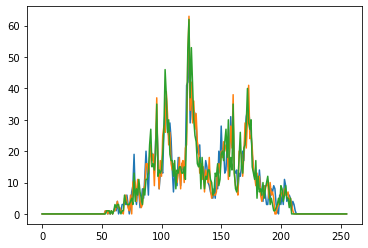

In [12]:
#First see histogram
img = cv2.imread('sky.jpg')
colors = {'b','g','r'}

for i,col in enumerate(colors):
    hist = cv2.calcHist(img, [i], None, [256], [0,255])
    plt.plot(hist)


cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
cap = cv2.VideoCapture('car racing.mp4')
ret, frame = cap.read()

frame_h, frame_w = frame.shape[:2]
size = (frame_h, frame_w)
w = frame_w//8
h = frame_h//8
x =200
y = 400
track_window = (x,y,w,h)

roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = None
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

#now we define the iteration after which the shift will end.
term_crit = (cv2.TERM_CRITERIA_COUNT | cv2.TERM_CRITERIA_EPS, 10 ,1)

true, frame = cap.read()
while(True):
    if true == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        back_project = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
        num_iters,window = cv2.meanShift(back_project, track_window, term_crit)
        
        x,y,w,h = window
        cv2.rectangle(frame, (x,y), (x+w, y+h), (242,51,185),2)
        cv2.imshow('Frame', frame)
        
        true, frame = cap.read()
        #cv2.imshow('back-projection', back_project)
        if cv2.waitKey(30) & 0xFF == 27:
            break

cap.release()
cv2.destroyAllWindows()